# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
# Import passengers.csv and set it as a time-series object. Plot the TS

In [2]:
df = pd.read_csv('passengers.csv')
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
df['Date'] = pd.to_datetime(df['Month'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.drop(['Month'], axis=1)

In [4]:
df.head()

,#Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


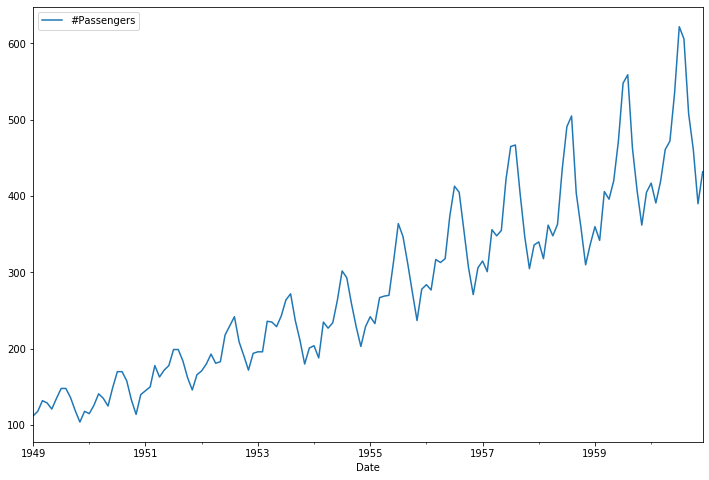

In [5]:
df.plot(figsize = (12,8));

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [6]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def roll_stat(data, win=8):
    rolmean = data.rolling(window = win, center = False).mean()
    rolstd = data.rolling(window = win, center = False).std()
    
    fig = plt.figure(figsize=(12,7))
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    pass

In [7]:
def dickey_fuller(data):
    
    dftest = adfuller(data)
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    pass

Use your newly created function on the airpassenger data set.

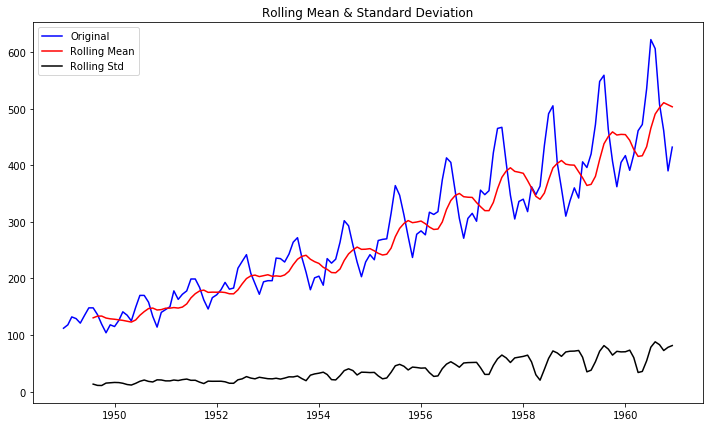

In [8]:
# Code here
roll_stat(df,8)

In [9]:
dickey_fuller(df['#Passengers'])

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Perform a log() and sqrt() transform

In [10]:
# Log transform timeseries and compare with original to check the effect
df_log = np.log(df['#Passengers'])

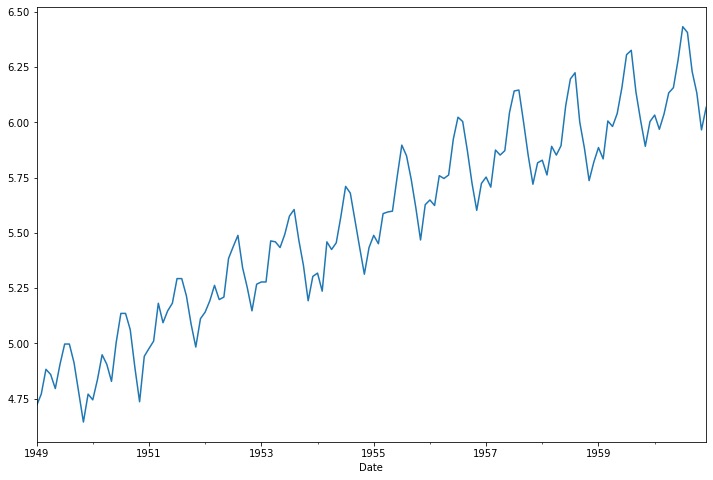

In [11]:
df_log.plot(figsize = (12,8));

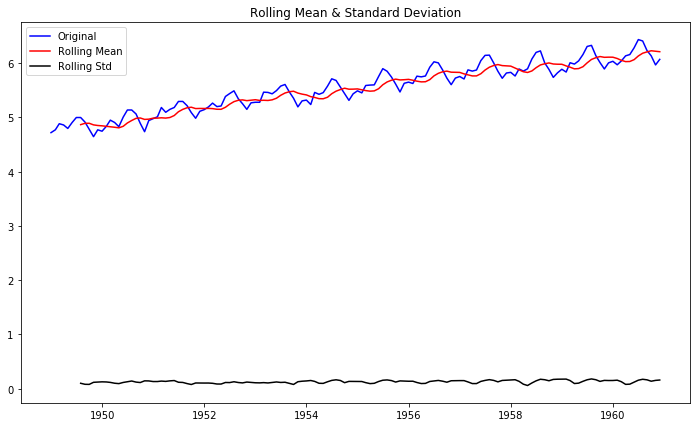

In [12]:
roll_stat(df_log)

In [13]:
dickey_fuller(df_log)

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [14]:
df_sqrt = np.sqrt(df['#Passengers'])

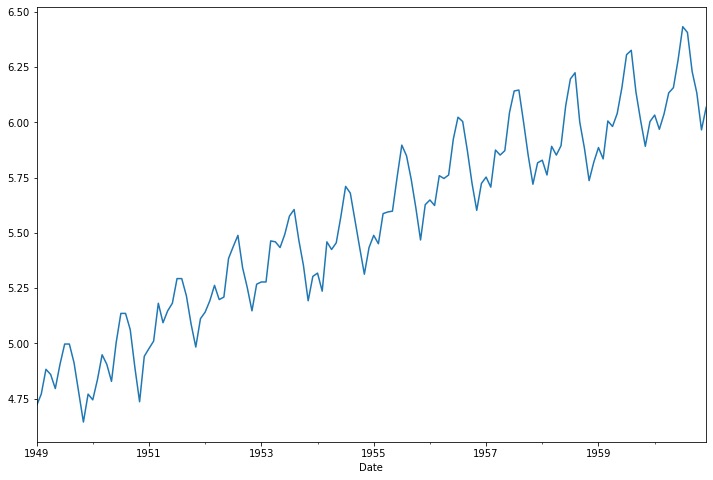

In [15]:
df_log.plot(figsize = (12,8));

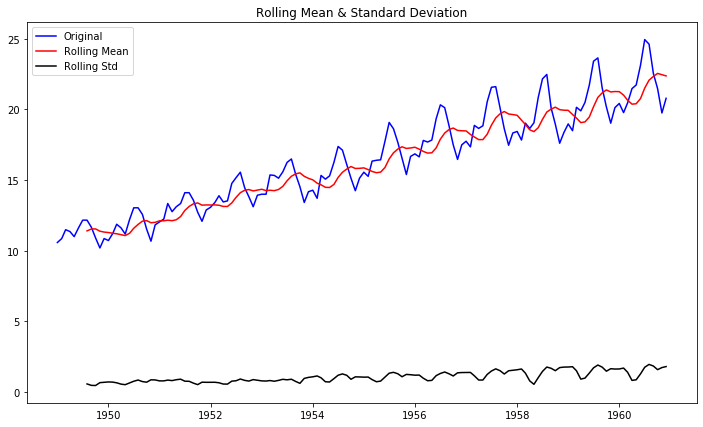

In [16]:
roll_stat(df_sqrt)

In [17]:
dickey_fuller(df_sqrt)

Test Statistic                  -0.345854
p-value                          0.918754
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

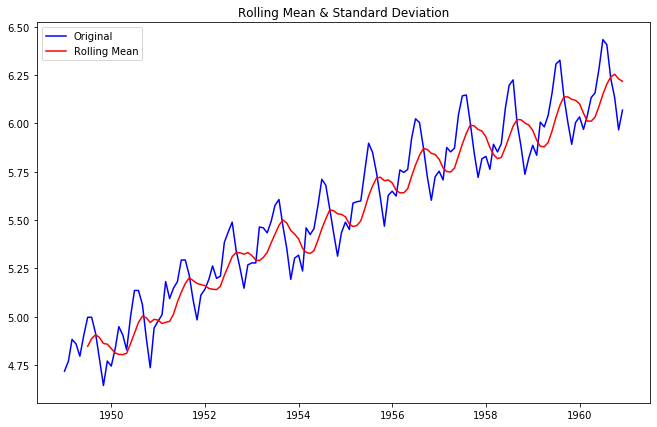

In [18]:
# your code here
rolmean_log = df_log.rolling(window = 7).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(df_log, color='blue',label='Original')
mean = plt.plot(rolmean_log, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [19]:
# Subtract the moving average from the original data and check head for Nans
df_minus_rolmean_log = df_log - rolmean_log
df_minus_rolmean_log.head(15)

Date
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.150059
1949-08-01    0.110242
1949-09-01    0.005404
1949-10-01   -0.113317
1949-11-01   -0.217275
1949-12-01   -0.087394
1950-01-01   -0.090241
1950-02-01    0.024099
1950-03-01    0.143499
Name: #Passengers, dtype: float64

In [20]:
# Drop the NaN values from timeseries calculated above
df_minus_rolmean_log.dropna(inplace=True)

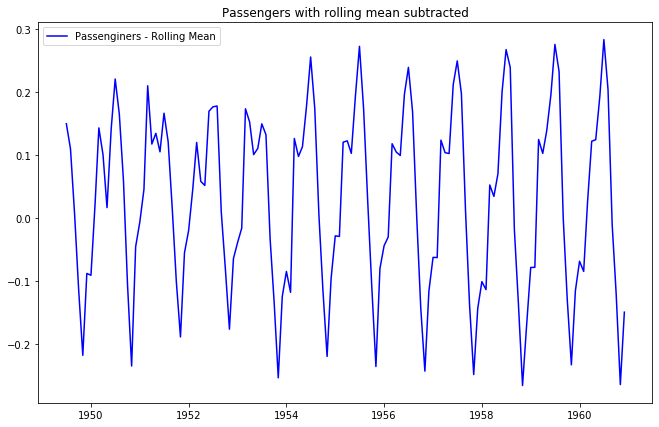

In [21]:
# Plot the result
fig = plt.figure(figsize=(11,7))
plt.plot(df_minus_rolmean_log, color='blue',label='Passenginers - Rolling Mean')
plt.legend(loc='best')
plt.title('Passengers with rolling mean subtracted')
plt.show(block=False)

Finally, use your function `check_stationarity` to see if this series is considered stationary!

In [22]:
# Your code here
dickey_fuller(df_minus_rolmean_log)

Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
# Your conclusion here
# better stationarity

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

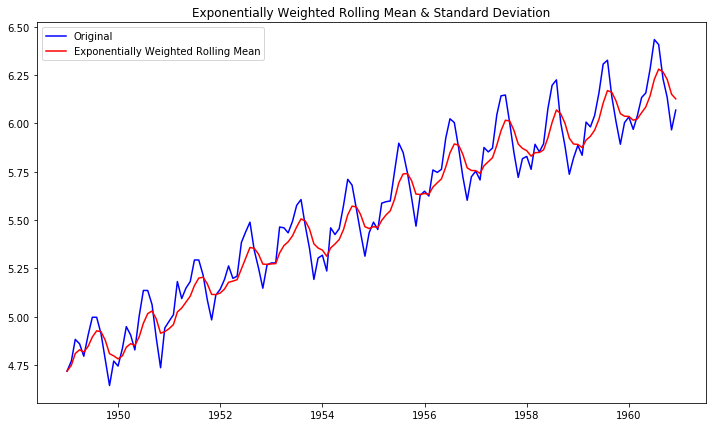

In [23]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = df_log.ewm(halflife = 2).mean()
# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(df_log, color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

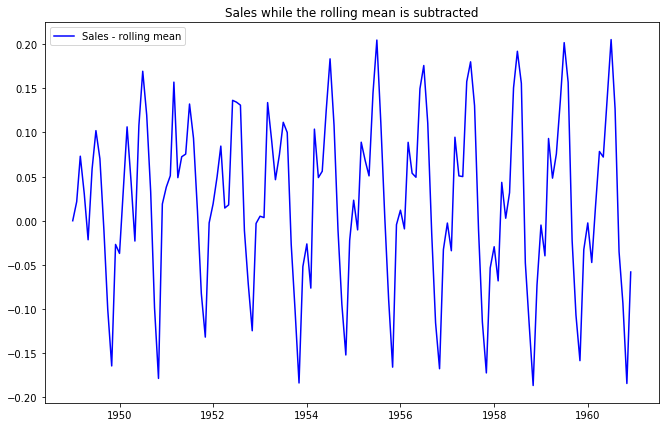

In [24]:
# Subtract the moving average from the original data and plot
df_minus_exp_rolmean = df_log - exp_rolmean
#df_minus_exp_rolmean.head(15)

fig = plt.figure(figsize=(11,7))
plt.plot(df_minus_exp_rolmean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

In [25]:
# do a stationarity check
dickey_fuller(df_minus_exp_rolmean)

Test Statistic                  -3.087696
p-value                          0.027477
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
# Your conclusion here
# 95% confidence interval stationarity 

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

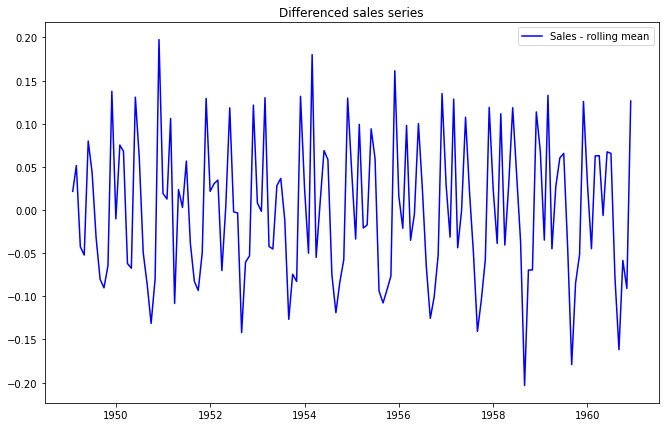

In [26]:
# difference your data and look at the head
df_diff = df_minus_exp_rolmean.diff(periods=1)
df_diff.head(10)

fig = plt.figure(figsize=(11,7))
plt.plot(df_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [14]:
# plot your differenced time series

In [27]:
# drop nas
df_diff.dropna(inplace=True)

In [28]:
# perform the stationarity check
dickey_fuller(df_diff)

Test Statistic                  -4.042240
p-value                          0.001205
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


### Your conclusion

In [ ]:
# Your conclusion here

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.